# Importing important libraries

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
y = y.astype('int')

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

# Data Visualisation

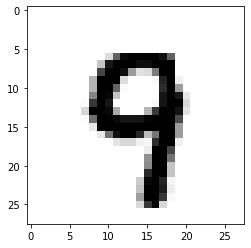

In [ ]:
some_image = x[520]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

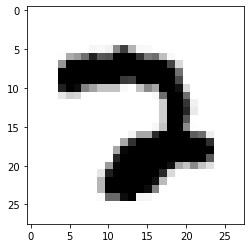

In [ ]:
some_image = x[120]
some_image = some_image.reshape(28,28)
plt.imshow(some_image, cmap=matplotlib.cm.binary,interpolation='nearest')

# Bagging algorithm

In [ ]:
def bagging():
  
  indexes = np.random.randint(0, len(x_train), len(x_train))
  bag = x_train[indexes]
  target = y_train[indexes]
  return (bag,target)


## Bag 1

In [ ]:
bag1 = bagging()
print(bag1[0].shape,'\n', bag1[1].shape)

(60000, 784) 
 (60000,)


In [ ]:
dtc1 = DecisionTreeClassifier()        # training bag 1
dtc1.fit(bag1[0], bag1[1])

DecisionTreeClassifier()

# Bag 2

In [ ]:
bag2 = bagging()
print(bag2[0].shape,'\n', bag2[1].shape)

(60000, 784) 
 (60000,)


In [ ]:
dtc2 = DecisionTreeClassifier()        # training bag 2
dtc2.fit(bag2[0], bag2[1])

DecisionTreeClassifier()

## Bag 3

In [ ]:
bag3 = bagging()
print(bag3[0].shape,'\n', bag3[1].shape)

(60000, 784) 
 (60000,)


In [ ]:
dtc3 = DecisionTreeClassifier()        # training bag 3
dtc3.fit(bag3[0], bag3[1])

DecisionTreeClassifier()

# Combining the result of all 3 classifiers

In [ ]:
pred_1 = dtc1.predict(x_test)
pred_2 = dtc2.predict(x_test)
pred_3 = dtc3.predict(x_test)

# Majority voting

In [ ]:
y_pred = []

for i in range(len(x_test)):
  
  node = [pred_1[i], pred_2[i], pred_3[i]]
  majority_vote = max( node , key = node.count)
  y_pred.append(majority_vote)

y_pred = np.array(y_pred)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [ ]:
print(accuracy_score( y_test, y_pred))    # accuracy

0.8995


# Plotting the confusion matrix ,
# confusion matrix gives the classwise accuracy

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size': 8})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

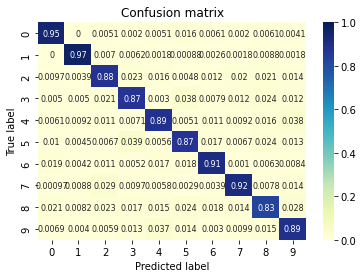

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report
cm3 = confusion_matrix(y_test, y_pred)
cm_norm3 = cm3 / cm3.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm3, classes = [0,1,2,3,4,5,6,7,8,9], title='Confusion matrix')